In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
def vector_length(x):
    return np.sqrt(x@x)

In [4]:
def Golden_Section(f, a, b, epsilon):
    gamma = (1 + np.sqrt(5))/2  
    c = 1/gamma
    
    x = b - c*(b-a) # defining the x_0
    y = a + c*(b-a) # defining the y_0
    
    fx = f(x)       # defining the f(x_0)
    fy = f(y)       # defining the f(y_0)

    while abs(b-a) > epsilon:
        if fx > fy: 
            a = x
            x = y
            fx = fy 
            
            y = a + c*(b-a) 
            fy = f(y)
            
        else:
            b = y  
            y = x  
            fy = fx  
            
            x = b - c*(b-a)
            fx = f(x)
         
    return x

In [5]:
#the first function
def f1(x):
    return np.power(5*x[0]-x[1],4) + np.power(x[0]-2,2) + x[0] - 2*x[1] + 12
def df1(x):
    dx1 = 20*np.power(5*x[0]-x[1],3) + 2*(x[0]-2) + 1
    dx2 = -4*np.power(5*x[0]-x[1],3) - 2
    return np.array([dx1, dx2])
def H1(x):
    x1x1 = 300*np.power(5*x[0]-x[1],2) + 2
    x1x2 = x2x1 = -60*np.power(5*x[0]-x[1],2)
    x2x2 = 12*np.power(5*x[0]-x[1],2)
    return np.array([[x1x1,x1x2],
                     [x2x1,x2x2]])

#the second function
def f2(x):
    return 100*np.power(x[1]-np.power(x[0],2),2) + np.power(1-x[0],2)
def df2(x):
    dx1 = 400*(np.power(x[0],3) - x[0]*x[1]) + 2 * (x[0]-1)
    dx2 = 200*(x[1]-np.power(x[0],2))
    return np.array([dx1, dx2])
def H2(x):
    x1x1 = 400*(np.power(3*x[0],2) - x[1]) + 2
    x1x2 = x2x1 = -400*x[0]
    x2x2 = 200
    return np.array([[x1x1,x1x2],
                     [x2x1,x2x2]])

In [6]:
def NewtonMethod(f,df,H,x_0, epsilon, max_it=1000):
    list_x = [x_0]    #hold x values
    list_fx = []      #hold f(x) values
    list_d = []       #hold directions
    list_alpha = []   #hold alpha values
    
    for it in range(max_it):
        x = list_x[it]             #take new x from the previous iteration
        df_k = df(x)               #calculate the gradient of the function at x
        if vector_length(df_k) <= epsilon:
            break                  #stop when the gradient is close enough to zero
        
        H_k = np.linalg.inv(H(x))  #calculate the inverse of the Hessian of the function at x
        d_k = -H_k @ df_k          #calculate the direction
        
        def f_line(a):
            return f(x+a*d_k)      #this function is for the exact line search below
        alpha = Golden_Section(f_line, -100, 100, epsilon*1e-1) #find the alpha that minimizes f_line
        
        x_new = x + alpha * d_k    #find new x
        
        list_fx.append(f(x))       #calculate and store f(x)
        list_d.append(d_k)         #store direction
        list_alpha.append(alpha)   #store alpha
        list_x.append(x_new)       #store new x

    output = pd.DataFrame({'x(k)':list_x[:-1],'f(x(k))':list_fx,'d(k)':list_d,'alpha(k)':list_alpha,'x(k+1)':list_x[1:]})
    return output, np.array(list_x)

In [7]:
output1,x1 = NewtonMethod(f1,df1,H1, np.array([12,-10]), 0.0001)
output1

,x(k),f(x(k)),d(k),alpha(k),x(k+1)
0,"[12, -10]",2.401014e+07,"[-5.499999999534339, -4.166632652282715]",2.960698,"[-4.283836363628804, -22.336138964157975]"
1,"[-4.283836363628804, -22.336138964157975]",9.258200e+01,"[10.783836363628954, 54.42305566024912]",1.004930,"[6.553167713598725, 32.355239521005544]"
2,"[6.553167713598725, 32.355239521005544]",-2.539755e+01,"[-0.053167713598725186, 0.8596101838087407]",1.070019,"[6.496277247732112, 33.27503878470261]"
3,"[6.496277247732112, 33.27503878470261]",-2.744054e+01,"[0.0037227522678882265, 0.01866174418216029]",0.999991,"[6.499999967959694, 33.293700368270265]"


In [8]:
blue = np.array([0.,0.,1])
red = np.array([1.,0.,0.])
def color_gradient(n, c1=blue, c2=red):
    c = []
    for i in range(n):
        k = 1-i/n
        c.append(k*c1+(1-k)*c2)
    return np.array(c)

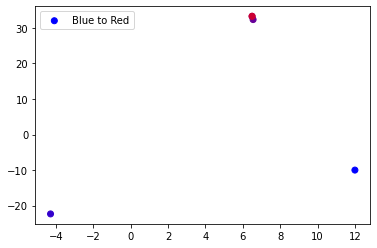

In [9]:
plt.scatter(x1[:,0], x1[:,1], c = color_gradient(x1.shape[0]), label='Blue to Red')
plt.legend(loc='upper left')

In [10]:
output2, x2 = NewtonMethod(f2,df2,H2, np.array([5,-10]), 0.0001, 20000)
output2

,x(k),f(x(k)),d(k),alpha(k),x(k+1)
0,"[5, -10]",1.225160e+05,"[-0.00010810518634629673, 34.99891894813654]",0.999997,"[4.999891895096452, 24.99882739256791]"
1,"[4.999891895096452, 24.99882739256791]",1.599914e+01,"[-0.0001333309695070246, -0.00124171078432929]",99.999994,"[4.986558798944491, 24.874656321573653]"
2,"[4.986558798944491, 24.874656321573653]",1.590055e+01,"[-0.00013360612124392447, -0.010220135801894166]",1.067423,"[4.986416184644039, 24.863747109448216]"
3,"[4.986416184644039, 24.863747109448216]",1.589155e+01,"[-0.000133600488064148, -0.0007331182401209591]",15.844386,"[4.984299366905613, 24.85213130087193]"
4,"[4.984299366905613, 24.85213130087193]",1.588255e+01,"[-0.00013365149329210493, -0.010223440043040967]",1.067357,"[4.984156713053443, 24.841219240941754]"
...,...,...,...,...,...
1250,"[1.0000563384665777, 1.0001143693015975]",3.459361e-09,"[-4.6904363171872594e-08, -1.7830084306134172e...",1.009253,"[1.0000562911281932, 1.000112569794405]"
1251,"[1.0000562911281932, 1.000112569794405]",3.168716e-09,"[-4.686494295932324e-08, -7.810448976764219e-08]",99.991709,"[1.0000516050224426, 1.000104759992973]"
1252,"[1.0000516050224426, 1.000104759992973]",2.902487e-09,"[-4.296395872190288e-08, -1.6332173612070297e-06]",1.009253,"[1.0000515616609242, 1.000103111662916]"
1253,"[1.0000515616609242, 1.000103111662916]",2.658625e-09,"[-4.292785045575749e-08, -7.154259039614793e-08]",99.992053,"[1.0000472692170084, 1.0000959579723954]"


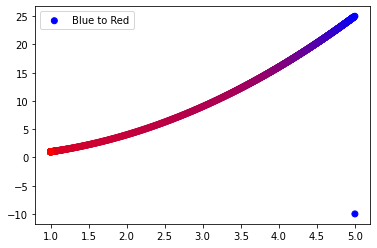

In [11]:
plt.scatter(x2[:,0], x2[:,1], c = color_gradient(x2.shape[0]), label='Blue to Red')
plt.legend(loc='upper left')

In [12]:
x2

array([[  5.        , -10.        ],
       [  4.9998919 ,  24.99882739],
       [  4.9865588 ,  24.87465632],
       ...,
       [  1.00005156,   1.00010311],
       [  1.00004727,   1.00009596],
       [  1.00004723,   1.00009445]])